# Introduction to PyTorch

## How to create tensors?

    All of deep learning is computations on tensors, which are generalizations of a matrices that can be indexed in more than 2 dimensions.
    So, let's look at how to create tensors, and some operations on them.

In [1]:
%pylab inline

import torch

print(torch.__version__)

! pip install torchviz
import torchviz

Populating the interactive namespace from numpy and matplotlib
1.7.0+cu101
     |████████████████████████████████| 51kB 7.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=6b021cbf1f40c1dce515632a90ff4a890f676ef6ba74a2c6e6ea3d51d6be450b
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


    The main way to create a tensor is to initialise it from an existing list or `numpy.ndarray`

In [2]:
l = [1, 2, 3, 4, 5]
l_tensor = torch.tensor(l)
print(l_tensor)

l_numpy = np.array(l)
l_tensor = torch.from_numpy(l_numpy)
print(l_tensor)

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5])


     But in real life you usually create tensors you need directly in `pytorch` without any extra memory allocation.
     There are so many ways to do this and let's look at some of them

In [3]:
x = torch.arange(10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
# just like in numpy
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    We can see the type of elements in the tensor, its size, the number of dimensions in it and much more

In [5]:
print(f"type of elements: {x.dtype}")
print(f"size (or shape) : {x.size()}")
print(f"number of dim: {x.dim()}")

type of elements: torch.int64
size (or shape) : torch.Size([10])
number of dim: 1


    Apart from `torch.arange` we can create a tensor of all zeros, ones or just random from some distribution

In [6]:
# Set the desired tensor size (or shape)
desired_shape = (1, 5, 10)

ones_tensor = torch.ones(desired_shape)
zeros_tensor = torch.zeros(desired_shape)

# each element of the tensor is sampled from a normal standard distribution
random_tensor = torch.randn(desired_shape)

In [7]:
print(random_tensor)
print(random_tensor.shape)

tensor([[[ 0.2157,  0.8946, -1.4455, -0.6727,  0.1173,  0.7475,  0.2135,
          -0.6513, -0.1615,  0.0965],
         [ 1.1898, -0.7170,  0.6082, -0.5406,  0.7977,  0.9073, -1.3503,
           0.8952,  1.5209, -0.7093],
         [ 1.3935,  1.0223,  0.2166,  0.0452, -1.1860,  1.0526,  0.6707,
          -0.4487, -1.3837, -1.3074],
         [-1.9036,  0.7029, -0.4763, -1.4931,  0.0172, -0.7155,  1.1286,
           0.7285,  0.3042,  1.0586],
         [-0.5707, -0.5184,  0.4564, -0.1997,  0.3021, -0.5370, -0.0385,
          -1.5016, -0.0966,  1.1674]]])
torch.Size([1, 5, 10])


## How to change shape of tensor?

    There are several ways to resize the tensor

In [8]:
tensor = torch.arange(100)

print(tensor.shape)
print(tensor)

torch.Size([100])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


    Now we would like to create a 10x10 matrix from the `tensor'

In [9]:
matrix = tensor.reshape(10, 10)

print(matrix.shape)
print(matrix)

torch.Size([10, 10])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])


    What if we want a tensor of order 3 with dimensions 2x10x5?

In [10]:
tensor_3d = tensor.reshape(2, 10, 5)

print(tensor_3d.shape)
print(tensor_3d)

torch.Size([2, 10, 5])
tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74],
         [75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84],
         [85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94],
         [95, 96, 97, 98, 99]]])


    Sometimes we want to swap dimensions, e.g. from 2x10x5 we want to get 5x10x2

In [11]:
tensor_3d_v2 = tensor_3d.transpose(dim0=0, dim1=2)
print(tensor_3d_v2.shape)

# or this way. it helps not to make a mistake
tensor_3d_v3 = tensor_3d.transpose(dim0=0, dim1=-1)
print(tensor_3d_v3.shape)

# or this way
tensor_3d_v4 = tensor_3d.permute(2, 1, 0)
print(tensor_3d_v4.shape)

torch.Size([5, 10, 2])
torch.Size([5, 10, 2])
torch.Size([5, 10, 2])


    You're also able to add new dimensions. It is often useful

In [12]:
torch.zeros((1, 10)).squeeze().shape

torch.Size([10])

In [13]:
tensor.unsqueeze(0).shape

torch.Size([1, 100])

    And in fact, there are many other useful functions that often come in handy.
    For example, `.chunk`, `.unfold`, `.flatten`, `.scatter`, `.gather`, ....
    
    So, feel free to dive into the PyTorch documentation (https://pytorch.org/docs/stable/torch.html) and find out more yourself :)
    

## Operations on tensors

    In general, PyTorch has all the same things as NumPy and maybe even a little more
    Let's look at the aggregating functions

In [14]:
tensor = torch.randn(2, 2)
t1 = tensor
t2 = tensor.abs()
# t2 = tensor.abs_()
print(t1)
print(t2)

tensor([[ 0.8639, -0.7968],
        [ 0.9972,  0.9713]])
tensor([[0.8639, 0.7968],
        [0.9972, 0.9713]])


In [15]:
tensor = torch.randn(10, 100, 1000)
print(tensor.shape)

torch.Size([10, 100, 1000])


In [16]:
tensor.mean(), tensor.sum(), tensor.max(), tensor.min()

(tensor(0.0007), tensor(740.7040), tensor(4.6572), tensor(-5.0459))

    Note that almost every aggregation function has argument `dim` and `keepdim`

In [17]:
# take mean over 0 dimension
print(tensor.mean(dim=0).shape)

# or over 0 and 1 dimensions
print(tensor.mean(dim=(0, 1)).shape)

torch.Size([100, 1000])
torch.Size([1000])


In [18]:
# take mean over 0 and 2 dimensions and keep dimensions
print(tensor.mean(dim=(0, 2), keepdim=True).shape)

torch.Size([1, 100, 1])


In [19]:
# Frobenius norm
print(tensor.norm(p='fro'))

tensor(1000.9782)


    Linear algrebra is also arranged very similarly to NumPy

In [20]:
A = torch.randn(10, 20)
B = torch.randn(20, 30)

In [21]:
C = A.matmul(B)

# or
C = A @ B

# or
C = torch.matmul(A, B)

print(C.shape)

torch.Size([10, 30])


## Automatic Differentiation

    Gradient automatic computation using backpropagation:
        1) Create a tensor/tensors which requires gradient: a = torch.tensor(..., requires_grad=True)
        2) Define some differentiable scalar function loss = whatever(a)
        3) Request backward pass with loss.backward()
        4) The gradient is available as a.grad
        
    Note that the loss must be a function of at least one tensor which requires gradient.
    For more information see https://pytorch.org/docs/stable/autograd.html



    Let's look at a simple example

In [22]:
x = torch.randn(4, requires_grad=True)
y = torch.randn(4, requires_grad=True)
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([-0.2088, -0.7146, -0.5044, -0.0348])
y: tensor([-0.0018,  0.6114,  1.4101,  0.4070])
dp / dx: tensor([-0.0018,  0.6114,  1.4101,  0.4070])
dp / dy: tensor([-0.2088, -0.7146, -0.5044, -0.0348])


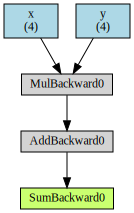

In [23]:
torchviz.make_dot(p, {"x": x, "y": y})

    Detaching variables. .detach() returns a copy of a variable, through which backpropagation doesn't pass.
    If you average or just store batch losses during the optimization, you'd better detach those losses before averaging or storing.
    Otherwise the computational graphs for each batch would be stored in memory as well as batch losses, so you run out of memory very fast.
    
    Also there is in-place version (.detach_()) which doesn't create detached copy of the variable, but detach variable itself from its computational graph.

In [24]:
x = torch.randn(4, requires_grad=True)
y = torch.randn(4, requires_grad=True)
z = x * y.detach_() + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([ 0.3889, -0.5213,  0.8184, -1.1020])
y: tensor([-1.6368, -1.8907,  2.0340,  0.2477])
dp / dx: tensor([-1.6368, -1.8907,  2.0340,  0.2477])
dp / dy: None


    Gradients are accumulated

In [25]:
x = torch.tensor([1., 1, 1, 1], requires_grad=True)

y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
# [2, 2, 2, 2]

# zero gradinents
x.grad.zero_()

y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
# [-1, -1, -1, -1]

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([-1., -1., -1., -1.])


    For memory saving, gradients are stored only for so called leaf-variables.

In [26]:
# don't pay attention to UserWarning from Python

x = torch.randn(4, requires_grad=True)  # leaf variable
y = x + 1                               # not a leaf variable
p = y.sum()                             # not a leaf variable
p.backward()
print('x:', x)
print('y:', y)
print('p:', p)
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x: tensor([-0.4508,  0.8150,  0.3940, -0.3059], requires_grad=True)
y: tensor([0.5492, 1.8150, 1.3940, 0.6941], grad_fn=<AddBackward0>)
p: tensor(4.4523, grad_fn=<SumBackward0>)
x.grad: tensor([1., 1., 1., 1.])
y.grad: None
p.grad: None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more in

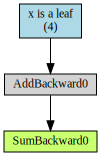

In [27]:
torchviz.make_dot(p, {"x is a leaf": x})

In [28]:
x = torch.randn(4, requires_grad=True)  # leaf variable
y = torch.randn(4, requires_grad=True)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: tensor([1., 1., 1., 1.])
y.grad: tensor([1., 1., 1., 1.])
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if __name__ == '__main__':


    One can use .retain_grad() to save gradients for non-leaf variables.

In [29]:
x = torch.randn(4, requires_grad=True)   # leaf variable
z = torch.randn(4, requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad)
print('dp / dz:', z.grad)
print('dp / dw:', w.grad)

dp / dx: tensor([ 0.2308, -2.6653, -5.4360, -1.0977])
dp / dz: tensor([-0.6123,  0.1901, -2.4733,  2.1066])
dp / dw: tensor([-0.3061,  0.0950, -1.2367,  1.0533])


    Note that even if there are non-leaf variables which require gradient in the computational graph, .backward() will fail.
    For this to work one of the leaf variables must require gradient.

In [30]:
# will not work
x = torch.randn(4, requires_grad=False)   # leaf variable
z = torch.randn(4, requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: ignored

## Optimization

    Let's use optimization in PyTorch to find minimum of some simple function

In [31]:
import time
from IPython import display

In [32]:
def func(x):
    return (x - 10) ** 2 + 14

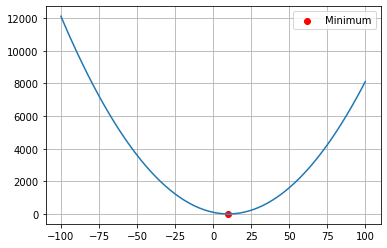

In [33]:
x = torch.linspace(-100, 100, 100)
y = func(x)

plt.plot(x, y)
plt.scatter([10], [14], label='Minimum', c='red')
plt.legend()
plt.grid()
plt.show()

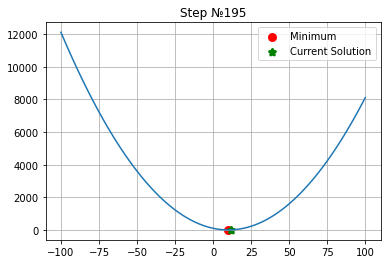

In [34]:
# requires_grad=True is required
current_solution = torch.tensor([100.], requires_grad=True)

# initialize a simple SGD
# SGD will minimize w.r.t current_solution
# optimizer = torch.optim.SGD([current_solution], 1e-2)

for i in range(200):  # 200 steps
    # forward pass
    current_loss = func(current_solution)
    
    # zero out .grad of `current_solution`
    # optimizer.zero_grad()
    if current_solution.grad is not None:
        current_solution.grad.zero_()
    
    # compute gradients w.r.t `current_solution`
    current_loss.backward()
    
    # update current_solution
    # optimizer.step()
    with torch.no_grad():
        current_solution -= 0.01 * current_solution.grad
    
    if i % 5 == 0:
        display.clear_output(wait=True)
        
        x = torch.linspace(-100, 100, 100)
        y = func(x)

        plt.plot(x, y)
        plt.scatter([10], [14], label='Minimum', c='red', linewidths=3)
        plt.scatter([current_solution.item()], [current_loss.item()],
                    label='Current Solution', marker='*', c='green', linewidths=3)
        
        plt.legend()
        plt.grid()
        plt.title(f'Step №{i}')
        plt.show()
        
        time.sleep(0.01)

## Dataset API
    PyTorch provides convenient functionality for working with data during neural network training.

In [35]:
from torch.utils.data import DataLoader, Dataset

    The `Dataset` is a class that initializes our data somehow in the constructor.
    It also has two main methods __getitem__ and __len__.
    Let's make a simple dataset, where one element is a vector of size 5

In [36]:
class SimpleDataset(Dataset):
    def __init__(self, data: torch.Tensor):
        self.data = data
    
    def __getitem__(self, index: int):
        return self.data[index]

    def __len__(self):
        return len(self.data)

In [37]:
example_data = torch.randn(1000, 5)
simple_dataset = SimpleDataset(example_data)

In [38]:
simple_dataset[10]

tensor([-0.3653, -1.3285,  0.6291, -0.3303, -1.4652])

In [39]:
len(simple_dataset)

1000

    Second important class is `Dataloader`.
    It takes some objects from the dataset and gathers them into a batch.

In [40]:
simple_dataloader = DataLoader(simple_dataset, batch_size=10)

In [41]:
import tqdm

for batch in tqdm.notebook.tqdm(simple_dataloader):
    time.sleep(0.1)

    Note that `simple_dataloader` is an iterator and has not yet done anything with the data.
    Let's take a look at the first batсh

In [42]:
for batch in simple_dataloader:
    first_batch = batch
    print(first_batch.shape)
    print(first_batch)
    break

torch.Size([10, 5])
tensor([[-0.6226, -0.4401, -2.2432,  0.2585,  0.7724],
        [-0.8062, -0.4363,  1.4957, -1.2187,  0.0770],
        [-0.6911,  0.4533, -0.4181,  0.0156, -1.0852],
        [-0.4620, -0.2928,  2.2494, -0.7180, -0.0979],
        [ 0.0214, -0.2662,  0.9616,  1.8389,  0.3056],
        [ 0.8481,  1.0624, -1.2541,  2.3571, -0.8507],
        [-1.3717,  0.2551,  1.2340,  1.4999, -0.4176],
        [ 0.5958,  1.0741, -0.7241,  0.4152,  0.8516],
        [-0.9830,  0.5546,  0.7828, -0.5277,  2.8273],
        [-0.8523, -0.4364,  0.7612, -0.8022, -0.9363]])


    DataLoader has many arguments for detailed configuration. Check the documentation so you can use it in the future (https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

## Utilizing GPU

In [43]:
! nvidia-smi

Sun Feb 14 12:51:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [45]:
%%time
# CPU
x = torch.rand((20000, 20000))
print(x.pow(10))

tensor([[3.5902e-05, 8.3231e-04, 9.9971e-01,  ..., 7.7664e-02, 7.0198e-14,
         1.9949e-08],
        [6.1042e-04, 1.6134e-08, 2.1629e-03,  ..., 1.8420e-06, 2.3707e-05,
         1.0324e-02],
        [8.2951e-01, 7.4127e-02, 7.1888e-02,  ..., 4.2263e-01, 8.2192e-01,
         2.0042e-03],
        ...,
        [2.0664e-12, 1.5766e-06, 6.5092e-01,  ..., 2.8419e-08, 1.4412e-06,
         4.0098e-11],
        [7.2595e-02, 3.9269e-08, 1.0887e-01,  ..., 5.0464e-02, 8.5259e-01,
         6.7341e-01],
        [8.8284e-09, 3.1305e-06, 3.3996e-08,  ..., 1.0976e-01, 1.6763e-03,
         5.6588e-01]])
CPU times: user 5.51 s, sys: 1.17 s, total: 6.67 s
Wall time: 6.69 s


In [47]:
%%time
# GPU (200x faster) (may have to run one more time because of the initialization time)
x = torch.rand((20000, 20000), device=device)
print(x.pow(10))

tensor([[3.8303e-03, 1.9980e-02, 1.6415e-03,  ..., 1.0165e-05, 1.5240e-08,
         9.9383e-03],
        [3.9818e-13, 1.1910e-07, 1.1683e-04,  ..., 7.7673e-03, 3.6155e-02,
         1.2789e-02],
        [2.3430e-02, 1.6211e-04, 7.5330e-10,  ..., 8.0702e-05, 2.5201e-05,
         3.3917e-05],
        ...,
        [1.7142e-05, 3.0984e-09, 6.2394e-03,  ..., 1.4517e-02, 1.9942e-14,
         9.9560e-01],
        [2.8605e-02, 1.9443e-01, 5.6077e-11,  ..., 1.1490e-04, 2.8976e-03,
         7.2811e-09],
        [2.7629e-03, 8.1318e-02, 1.1677e-04,  ..., 8.6852e-05, 1.9755e-02,
         1.5760e-01]], device='cuda:0')
CPU times: user 11 ms, sys: 10.7 ms, total: 21.6 ms
Wall time: 26.5 ms
